# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [66]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [67]:
# Example importing the CSV here
url='https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df=pd.read_csv(url)
df.shape

(48895, 16)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [69]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print("Numerical variables:", num_vars)
print("Categorical variables:", cat_vars)


Numerical variables: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical variables: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [70]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

reviews_per_month                 0.205583
id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [71]:
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

last_review            0.205583
host_name              0.000429
name                   0.000327
neighbourhood_group    0.000000
neighbourhood          0.000000
room_type              0.000000
dtype: float64

The data frame has 16 variables and there are three variables types: int64, object and float64.
Four variables have missing values (one numerical and three categorical).  For two variables the missing values represent about 20% of the total vaues (last_review and reviews_per_month). For host_name and name, the missing values are not significant. 

I decided not to eliminate variables with missing values because I do not known if they could be important or not for model. After knowing the model, I could impute the mean for numerical varibles or the more frequent value for the categorical ones. 

In [72]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16688,13346113,"Entire 2 BR apartment, 15 steps from the subway!",16278677,Grant,Brooklyn,Williamsburg,40.71459,-73.93885,Entire home/apt,200,7,0,NaN,NaN,1,146
41516,32278370,Furnished room in a nice apt 20 mins to Manhattan,212151296,Ella,Queens,Rego Park,40.72871,-73.86014,Private room,54,2,10,2019-07-01,2.34,1,319
1666,755528,PRIVATE BATH/TONS OF SUNLIGHT/SAFE,3684360,Enrique,Bronx,Allerton,40.85840,-73.86969,Entire home/apt,49,2,189,2019-06-23,2.32,4,238
34543,27390867,NYU/UNION SQRE/EAST VILLAGE-QUIET STUDIO EAST ...,200380610,Pranjal,Manhattan,Kips Bay,40.73865,-73.97810,Entire home/apt,185,30,0,NaN,NaN,65,364
16235,13092604,"Broadway, Luxury 1bd in Times Square",22541573,Ken,Manhattan,Theater District,40.76106,-73.98480,Entire home/apt,256,30,0,NaN,NaN,87,340
37142,29518083,"Premier room in UWS NYC, Columbia, Central Park",222285897,Alvin,Manhattan,Morningside Heights,40.80392,-73.96556,Private room,120,1,52,2019-06-17,6.14,4,31
12941,9839017,The new MBnb: No Breakfast. All Business.,3510997,Joe,Manhattan,Harlem,40.82545,-73.94969,Entire home/apt,149,31,24,2019-06-30,0.58,1,149
18506,14575253,Sunny Bushwick space with yoga loft,74471200,Austin,Brooklyn,Bushwick,40.69485,-73.92948,Private room,81,1,10,2017-09-18,0.29,1,35
41020,31895547,Private room and bath 10 minutes to Manhattan,15437944,Chelsea,Brooklyn,Williamsburg,40.70703,-73.95396,Private room,100,2,0,NaN,NaN,1,0
43269,33552714,Heaven,22388020,Lùis,Brooklyn,Bushwick,40.70230,-73.91911,Private room,59,1,8,2019-06-25,2.73,1,56


Change some variables types to the corrects one:

In [73]:
df=df.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

some statitical information:

In [74]:
round(df.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


Variable analysis:

the latitude and logitude are ok, they are for the same city so the mean is the same as the max and min, etc.

price: it seems that there are outliers, because the maximum value is 10000 and the 3th quartile is 175.

minimum_nights: same happens in this variable, the maximum value does not seems to be possible (1250) given than the 3th quartile is 5.

for the number of reviews and reviews per month, there are some extreme values, much bigger than the 3th quantile.

calculated host listing count: I interpreted that this variable as the number of properties that has the same host. One host has327 properties. On average each host has seven properties.

availability 365: it seems that AIRBNB is not the right platform to rent a room/property for a full year, but it seems is possible because the max for this variables is 365.

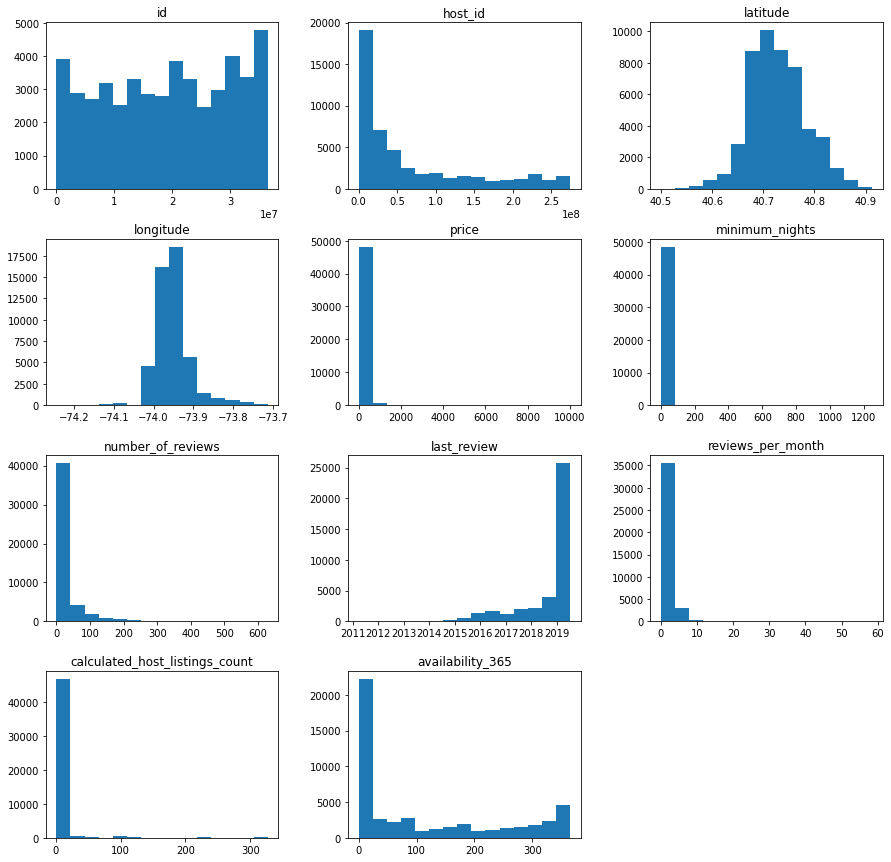

In [75]:
df.hist(bins=15,figsize=(15,15),grid=False);

In [76]:
df.groupby('neighbourhood_group').size().reset_index(name='Number or properties').sort_values(by='Number or properties', ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))

,neighbourhood_group,Number or properties,Percentage_total
2,Manhattan,21661,44.30
1,Brooklyn,20104,41.12
3,Queens,5666,11.59
0,Bronx,1091,2.23
4,Staten Island,373,0.76


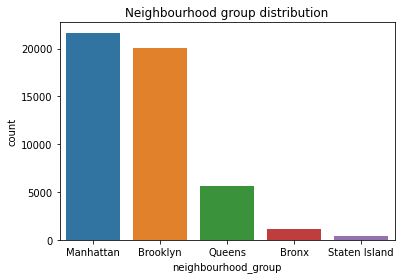

In [77]:
plot=sns.countplot(x='neighbourhood_group',data=df,order = df['neighbourhood_group'].value_counts().index).set(title='Neighbourhood group distribution')
plt.show()


The neighbourhood group with more properties is Manhattan, represent 44.3% of all properties. Is followed by Brooklyn with 41.1%.

In [78]:
df['neighbourhood'].unique()

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']

There are 221 differentes neighbourhoods.

In [79]:
table=df.groupby(['neighbourhood', 'neighbourhood_group']).size().reset_index(name='Number or properties').sort_values(by=['Number or properties'], ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))
table.head(15)

,neighbourhood,neighbourhood_group,Number or properties,Percentage_total
1071,Williamsburg,Brooklyn,3920,8.02
66,Bedford-Stuyvesant,Brooklyn,3714,7.60
472,Harlem,Manhattan,2658,5.44
141,Bushwick,Brooklyn,2465,5.04
1012,Upper West Side,Manhattan,1971,4.03
477,Hell's Kitchen,Manhattan,1958,4.00
322,East Village,Manhattan,1853,3.79
1007,Upper East Side,Manhattan,1798,3.68
256,Crown Heights,Brooklyn,1564,3.20
637,Midtown,Manhattan,1545,3.16


Altought the neighbourhood group with more properties is Manhattan, the neighbourhood with more properties is not located there (is in Brooklyn). Williamsburg represents 8.02% of all properties.

In [89]:
my_list=table['neighbourhood'].head(15).to_list()
df_filter
for i in my_list:
    df_filter=df[df['neighbourhood']==i]
df_filter

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
257,63360,Safe cute near subway& Manhattan NY NY retro s...,307962,Dennis & Naoko,Queens,Astoria,40.75384,-73.91433,Entire home/apt,99,5,441,2019-06-24,4.50,1,226
316,74680,One Bedroom Mini studio - Free WIFI,265109,Nazleen,Queens,Astoria,40.77635,-73.93426,Entire home/apt,115,2,198,2019-05-31,2.01,1,257
348,94035,"Modern, Safe, Clean, Bright Room in Astoria for 2",35375,Savannah,Queens,Astoria,40.75961,-73.91117,Private room,80,1,42,2019-07-06,1.21,2,365
385,115748,1 BDRM Apt-Weekend Sublease,585166,Lilly,Queens,Astoria,40.76434,-73.92132,Entire home/apt,110,4,30,2019-06-16,0.32,1,363
435,151199,Astoria-Private Home NYC-,722320,Gladys & Bob,Queens,Astoria,40.75725,-73.91098,Entire home/apt,129,1,414,2019-07-03,4.34,1,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,36382381,Spacious studio in the heart of downtown Astoria,273570019,Khaled,Queens,Astoria,40.76349,-73.92577,Private room,75,1,0,NaT,NaN,1,359
48685,36383565,Spacious Astoria Apartment in a Prime Location!,14258377,Tracy,Queens,Astoria,40.76389,-73.91963,Private room,50,4,0,NaT,NaN,1,38
48797,36437317,private room in Astoria,122204600,Mohammed,Queens,Astoria,40.76431,-73.90992,Private room,49,15,0,NaT,NaN,1,341
48822,36448708,Entire 3 Bedroom Astoria Apartment,183211776,Rafael,Queens,Astoria,40.76491,-73.90959,Entire home/apt,169,1,0,NaT,NaN,4,28


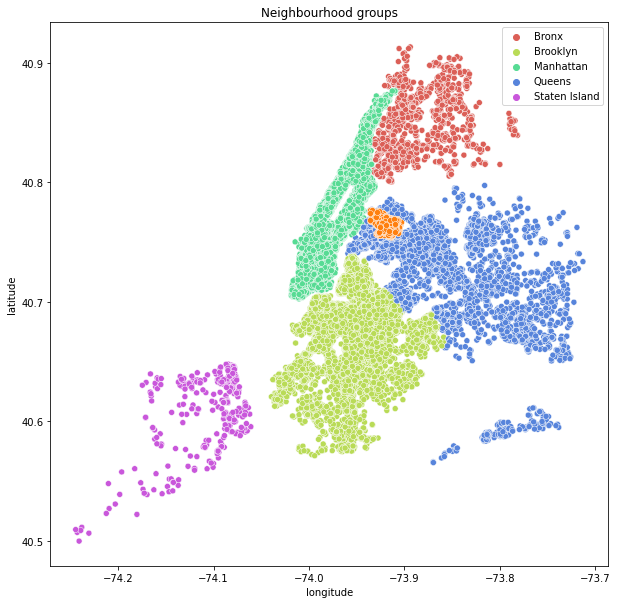

In [90]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], palette='hls')
plt.title('Neighbourhood groups')
plt.show()

In [82]:
df.groupby('room_type').size().reset_index(name='Number or properties').sort_values(by='Number or properties', ascending=False).assign(Percentage_total=lambda x: round(x['Number or properties']/sum(x['Number or properties'])*100,2))

,room_type,Number or properties,Percentage_total
0,Entire home/apt,25409,51.97
1,Private room,22326,45.66
2,Shared room,1160,2.37


Regarding the type of room, 52% are the entire home/apt, 46% are private rooms and 2% are shared rooms.

Where are the most expensive properties?

In [83]:
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


The most expensive properties are located in Manhattan (mean=196, meadian=150) and the chepeast are located in the Bronx (mean=87, median=65).

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

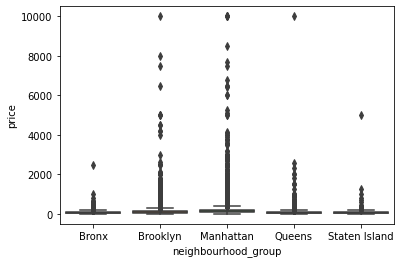

In [84]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

In order to make a violin plot I will eliminate some extreme values of the prices (keep the prices that are lower than the Manhattan 75 quartile).

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

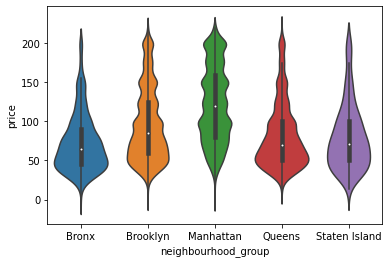

In [85]:
sns.violinplot(x='neighbourhood_group', y='price', data=df[df['price']<220])

Is there any relation between the price and the type of room?

<AxesSubplot:xlabel='room_type', ylabel='price'>

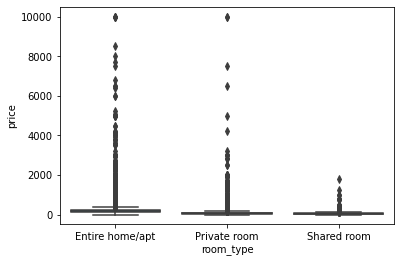

In [86]:
sns.boxplot(x='room_type', y='price', data=df)

The most expensive type of rooms are the entire home/apt, the cheaper are the shared rooms.

In [87]:
df.groupby(['neighbourhood_group','room_type'])['price'].describe()

count        mean         std   min  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379.0  127.506596   95.027102  28.0   
                    Private room       652.0   66.788344  107.009071   0.0   
                    Shared room         60.0   59.800000  101.798871  20.0   
Brooklyn            Entire home/apt   9559.0  178.327545  226.415825   0.0   
                    Private room     10132.0   76.500099  124.713499   0.0   
                    Shared room        413.0   50.527845   53.444485   0.0   
Manhattan           Entire home/apt  13199.0  249.239109  331.830132   0.0   
                    Private room      7982.0  116.776622  190.191318  10.0   
                    Shared room        480.0   88.977083   92.416534  10.0   
Queens              Entire home/apt   2096.0  147.050573  129.383208  10.0   
                    Private room      3372.0   71.762456  180.506756  10.0   
                    Shared room        198.0   69.020202  171.000607  11.0   
Staten Island       Entire home/apt    176.0  173.846591  394.600216  48.0   
                    Private room       188.0   62.292553   36.138245  20.0   
                    Shared room          9.0   57.444444   45.119594  13.0   

                                       25%    50%     75%      max  
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  140.00   1000.0  
                    Private room      40.0   53.5   70.00   2500.0  
                    Shared room       28.0   40.0   55.50    800.0  
Brooklyn            Entire home/apt  105.0  145.0  199.00  10000.0  
                    Private room      50.0   65.0   80.00   7500.0  
                    Shared room       30.0   36.0   50.00    725.0  
Manhattan           Entire home/apt  142.5  191.0  259.00  10000.0  
                    Private room      68.0   90.0  120.00   9999.0  
                    Shared room       49.0   69.0   89.25   1000.0  
Queens              Entire home/apt   90.0  120.0  168.25   2600.0  
                    Private room      47.0   60.0   75.00  10000.0  
                    Shared room       30.0   37.0   54.25   1800.0  
Staten Island       Entire home/apt   75.0  100.0  151.25   5000.0  
                    Private room      40.0   50.0   75.00    300.0  
                    Shared room       29.0   30.0   75.00    150.0

In [88]:
distribucion de la variable

SyntaxError: invalid syntax (2508265815.py, line 1)


chequear nulos y na--quizas esto deba de hacerlo antes q nada, conviene realizar algun tipo de imputación?
El tema de si algun id esta repetido o no y toda esa discusión. 
Fijarme si queda alguna variable sin analizar, falta la de 365Ñ que se podría decir

id unicos
?
la otra cat variable q no analice es last review.
host con muchos reviews?? tienen muchas propiedades?
precio promedio en los distintos barrios, donde 

In [ ]:
my_list=list(df['neighbourhood_group'].unique())
print(my_list)
for i in my_list:
    plot=sns.countplot(x='neighbourhood',data=df[df['neighbourhood_group']==i],order = df['neighbourhood'].value_counts().index).set(title='Neighbourhood group distribution')
    plt.show()
    

In [ ]:
print('Number of different hosts:', df['host_id'].nunique())

In [ ]:
print('Total rooms offered in the database: ', df['room_type'].value_counts().sum())
print('Different types of rooms:')
df['room_type'].value_counts()


In the Dataframe there are 48895 offered rooms and only 37457 host --> there are some hosts with more than one property.
Also the most offered room type is th entire home/apt.

In [ ]:
df.groupby('host_id')[['number_of_reviews','id']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean']}).sort_values(by=('id','nunique'),ascending=False)[0:10] # Top 10 host

In [ ]:
df_hn=round(df.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=('id','nunique'),ascending=False))[0:10] # Top 10 host
df_hn

In [ ]:
df_hn_filt=df[df['host_id'].isin(list(df_hn.reset_index()['host_id']))]
df_hn_filt

In [ ]:
pd.set_option('display.max_rows',110)
round(df_hn_filt.groupby(['host_id','neighbourhood_group','neighbourhood'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=['host_id',('id','nunique')],ascending=False).dropna()) # Top 10 host

In [ ]:
df_nei=df.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()

In [ ]:
df_nei.reset_index(inplace=True)

In [ ]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(5))

In [ ]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(5))